# Name:Mohamed Abdo Taha Salem
# id:20191480305
# e-mail:CDS.MohamedAbdo80305@alexu.edu.eg


# first we import the libraries that we would use

In [57]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# we loading the first two csv files 2020/2021

In [58]:
data1 = pd.read_csv('wuzzaf2021.csv',error_bad_lines=False)
data2 = pd.read_csv('wuzzaf_2020.csv')


b'Skipping line 665: expected 9 fields, saw 10\nSkipping line 672: expected 9 fields, saw 11\nSkipping line 693: expected 9 fields, saw 11\nSkipping line 801: expected 9 fields, saw 13\nSkipping line 836: expected 9 fields, saw 10\nSkipping line 851: expected 9 fields, saw 10\nSkipping line 852: expected 9 fields, saw 10\nSkipping line 899: expected 9 fields, saw 10\nSkipping line 972: expected 9 fields, saw 10\nSkipping line 985: expected 9 fields, saw 10\nSkipping line 1012: expected 9 fields, saw 10\nSkipping line 1021: expected 9 fields, saw 11\nSkipping line 1027: expected 9 fields, saw 10\nSkipping line 1431: expected 9 fields, saw 10\nSkipping line 1457: expected 9 fields, saw 10\nSkipping line 1527: expected 9 fields, saw 10\nSkipping line 1557: expected 9 fields, saw 10\nSkipping line 1615: expected 9 fields, saw 10\nSkipping line 2023: expected 9 fields, saw 10\nSkipping line 2124: expected 9 fields, saw 10\nSkipping line 2245: expected 9 fields, saw 15\nSkipping line 2279: e

# we make a copy of data to avoid error in the original

In [59]:
df1=data1.copy()
df2=data2.copy()


# Assessing

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL             2571 non-null   object
 1   job_titles      2571 non-null   object
 2   company_names   2571 non-null   object
 3   job_Link        2571 non-null   object
 4   job_profile     2571 non-null   object
 5    description    2571 non-null   object
 6    year           2571 non-null   object
 7   city            2571 non-null   object
 8   country         2372 non-null   object
dtypes: object(9)
memory usage: 180.9+ KB


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #PAGE_URL           2580 non-null   object
 1   title               2580 non-null   object
 2   company-name        2580 non-null   object
 3   job-link            2580 non-null   object
 4   job-link_link       2580 non-null   object
 5   short-description-  2580 non-null   object
 6   location            2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


# i had a problem at the scrapping in location column so i fixed it by merging  city and country

In [62]:
df1['Location']=df1['city']+df1['country']

In [63]:
df1 = df1.drop(columns=['city','country'])

# rename the two files to make it easy to merge  and read

In [64]:
df2=df2.rename(columns = {'#PAGE_URL':'URL1','title':'job_titles1','company-name': 'company_names1','job-link_link': 'job_profile1','short-description-':'description1','location':'Location','job-link':'job_Link1'})

# i had here problem that i cant change names in the scrapping data so i used this method to change names

In [65]:
df1.columns.values[0] = "URL1"
df1.columns.values[1] = "job_titles1"
df1.columns.values[2] = "company_names1"
df1.columns.values[3] = "job_Link1"
df1.columns.values[4] = "job_profile1"
df1.columns.values[5] = "description1"
df1.columns.values[6] = "year"

# the new columns

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL1            2571 non-null   object
 1   job_titles1     2571 non-null   object
 2   company_names1  2571 non-null   object
 3   job_Link1       2571 non-null   object
 4   job_profile1    2571 non-null   object
 5   description1    2571 non-null   object
 6   year            2571 non-null   object
 7   Location        2372 non-null   object
dtypes: object(8)
memory usage: 160.8+ KB


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL1            2580 non-null   object
 1   job_titles1     2580 non-null   object
 2   company_names1  2580 non-null   object
 3   job_Link1       2580 non-null   object
 4   job_profile1    2580 non-null   object
 5   description1    2580 non-null   object
 6   Location        2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


# i merge the two files  to start cleaning

In [68]:
y=pd.concat([df1, df2], axis=0)

In [69]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 2579
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL1            5151 non-null   object
 1   job_titles1     5151 non-null   object
 2   company_names1  5151 non-null   object
 3   job_Link1       5151 non-null   object
 4   job_profile1    5151 non-null   object
 5   description1    5151 non-null   object
 6   year            2571 non-null   object
 7   Location        4952 non-null   object
dtypes: object(8)
memory usage: 362.2+ KB


In [70]:
y.head(5)

,URL1,job_titles1,company_names1,job_Link1,job_profile1,description1,year,Location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Business Development Specialist - Upper Egypt,golden,Business Development Specialist - Upper Egypt,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-...,Full Time · Experienced · 2+ Yrs of Exp · Bus...,2021,- Aswan Egypt
1,https://wuzzuf.net/a/IT-Software-Development-...,Senior/Intermediate .NET Core Developer (Remo...,Confidential,Senior/Intermediate .NET Core Developer (Remo...,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Full Time · Experienced · 4+ Yrs of Exp · Sof...,2021,- Cairo Egypt
2,https://wuzzuf.net/a/IT-Software-Development-...,Senior Software Developer,Bnsights,Senior Software Developer,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Full Time · Experienced · 6-10 Yrs of Exp · S...,2021,- New Cairo Cairo
3,https://wuzzuf.net/a/IT-Software-Development-...,Software Developer / Desktop Development,ITS,Software Developer / Desktop Development,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,2021,- Nasr City Cairo
4,https://wuzzuf.net/a/IT-Software-Development-...,Senior Software Developer -Dynamics 365...,CrossWorkers,Senior Software Developer -Dynamics 365...,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Full Time · Experienced · 4-12 Yrs of Exp · A...,2021,- New Cairo Cairo


# the merge succed so i would do a copy file

In [71]:
df=y.copy()

# i would drop un important columns that i wouldnt use

In [72]:
df= df.drop(['URL1','job_Link1'], axis = 1)

In [73]:
df.head(5)

,job_titles1,company_names1,job_profile1,description1,year,Location
0,Business Development Specialist - Upper Egypt,golden,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-...,Full Time · Experienced · 2+ Yrs of Exp · Bus...,2021,- Aswan Egypt
1,Senior/Intermediate .NET Core Developer (Remo...,Confidential,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Full Time · Experienced · 4+ Yrs of Exp · Sof...,2021,- Cairo Egypt
2,Senior Software Developer,Bnsights,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Full Time · Experienced · 6-10 Yrs of Exp · S...,2021,- New Cairo Cairo
3,Software Developer / Desktop Development,ITS,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,2021,- Nasr City Cairo
4,Senior Software Developer -Dynamics 365...,CrossWorkers,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Full Time · Experienced · 4-12 Yrs of Exp · A...,2021,- New Cairo Cairo


In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_titles1     5151 non-null   object
 1   company_names1  5151 non-null   object
 2   job_profile1    5151 non-null   object
 3   description1    5151 non-null   object
 4   year            2571 non-null   object
 5   Location        4952 non-null   object
dtypes: object(6)
memory usage: 281.7+ KB


# searching about the null values

In [75]:
df.isnull().sum()


job_titles1          0
company_names1       0
job_profile1         0
description1         0
year              2580
Location           199
dtype: int64

# i found small null values at location column so i fixed it by change non values to un know

In [76]:
df['Location'].replace(' ', np.nan, inplace=True) 

In [77]:
df["Location"].fillna("un known",inplace=True)


# at the second file wuzzuf 2020 there isnt column for year so i  merged the two data and replace non value by 2020

In [78]:
df['year'].replace(' ', np.nan, inplace=True) 

In [79]:
df["year"].fillna(2020,inplace=True)


# i search again about non value but it fixed

In [80]:
df.isnull().sum()


job_titles1       0
company_names1    0
job_profile1      0
description1      0
year              0
Location          0
dtype: int64

# here i create a list and I started extracting the experience level from description column

In [81]:
 Description_Data=df.description1
Level_list=[]
for Temporary_variable in Description_Data:
    if('Entry Level' in Temporary_variable):
        Level_list.append('Entry Level')
    elif('Experienced' in Temporary_variable):
        Level_list.append('Experienced')
    elif('Manager'or 'Senior Management'in lev):
        Level_list.append('Manager')
    elif('Internship'in Temporary_variable):
        Level_list.append('Internship')
    else:
        Level_list.append(Temporary_variable) 

# i choose 5 levels

In [82]:
Level_list[:5]


['Experienced', 'Experienced', 'Experienced', 'Entry Level', 'Experienced']

# i check the length of the list  and data to search about non values but its good

In [83]:
len(Level_list)


5151

In [84]:
len(df)


5151

# here i create new column to but the data of level

In [85]:
z= DataFrame (Level_list,columns=['Level'])
print (z)

            Level
0     Experienced
1     Experienced
2     Experienced
3     Entry Level
4     Experienced
...           ...
5146  Experienced
5147  Experienced
5148  Experienced
5149      Manager
5150  Experienced

[5151 rows x 1 columns]


In [86]:
df['Level']=Level_list


In [87]:
df.head(10)

,job_titles1,company_names1,job_profile1,description1,year,Location,Level
0,Business Development Specialist - Upper Egypt,golden,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-...,Full Time · Experienced · 2+ Yrs of Exp · Bus...,2021,- Aswan Egypt,Experienced
1,Senior/Intermediate .NET Core Developer (Remo...,Confidential,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Full Time · Experienced · 4+ Yrs of Exp · Sof...,2021,- Cairo Egypt,Experienced
2,Senior Software Developer,Bnsights,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Full Time · Experienced · 6-10 Yrs of Exp · S...,2021,- New Cairo Cairo,Experienced
3,Software Developer / Desktop Development,ITS,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,2021,- Nasr City Cairo,Entry Level
4,Senior Software Developer -Dynamics 365...,CrossWorkers,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Full Time · Experienced · 4-12 Yrs of Exp · A...,2021,- New Cairo Cairo,Experienced
5,Senior Software Developer - Java,CrossWorkers,https://wuzzuf.net/jobs/p/2e2c1f50-862c-41d9-...,Full Time · Experienced · 4+ Yrs of Exp · Inf...,2021,- New Cairo Cairo,Experienced
6,Vodafone Egypt Customer Care Advisor,Vodafone Egypt,https://wuzzuf.net/jobs/p/f396ac99-f24e-4d88-...,Full Time · Entry Level · 0-3 Yrs of Exp · Ad...,2021,- Maadi Cairo,Entry Level
7,Software Developer - As/400 Developer,Target Recruitment & HR Solutions,https://wuzzuf.net/jobs/p/9aa73514-5bc1-49e1-...,Full Time · Experienced · 5-10 Yrs of Exp · S...,2021,- Cairo Egypt,Experienced
8,IT Developer,Confidential,https://wuzzuf.net/jobs/p/f84fc572-b364-491a-...,Full Time · Experienced · 2-3 Yrs of Exp · Co...,2021,- New Cairo Cairo,Experienced
9,Software Developer (AWS Serverless Experience),FlairsTech,https://wuzzuf.net/jobs/p/24ca1fdc-93d5-40e1-...,Full Time · Entry Level · 1-5 Yrs of Exp · AW...,- Maadi,un known,Entry Level


In [88]:
x=df.job_titles1

# here i Filter job titles1 into categories

In [89]:
Group_list=[]
for temp_jobtitle in x:
    if("IT" in temp_jobtitle):
        Group_list.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in temp_jobtitle):
        Group_list.append('Software Engneering ')
    else:
        Group_list.append(x)

In [90]:
df['StandardJobTitle']=Group_list
len(Group_list)

5151

# i tested and there isnt any non values

In [91]:
df.StandardJobTitle

0       Software Engneering 
1       Software Engneering 
2       Software Engneering 
3       Software Engneering 
4       Software Engneering 
                ...         
2575    Software Engneering 
2576    Software Engneering 
2577    Software Engneering 
2578    Software Engneering 
2579    Software Engneering 
Name: StandardJobTitle, Length: 5151, dtype: object

# Here i extract the experience years from the description in new column

In [92]:
x=df.description1.str.extract('(\d+)')
df['YearsOfExperience']=x


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 2579
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_titles1        5151 non-null   object
 1   company_names1     5151 non-null   object
 2   job_profile1       5151 non-null   object
 3   description1       5151 non-null   object
 4   year               5151 non-null   object
 5   Location           5151 non-null   object
 6   Level              5151 non-null   object
 7   StandardJobTitle   5151 non-null   object
 8   YearsOfExperience  5149 non-null   object
dtypes: object(9)
memory usage: 402.4+ KB


# i found two non values so  i dropped the two rows

In [94]:
df.dropna(inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5149 entries, 0 to 2579
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_titles1        5149 non-null   object
 1   company_names1     5149 non-null   object
 2   job_profile1       5149 non-null   object
 3   description1       5149 non-null   object
 4   year               5149 non-null   object
 5   Location           5149 non-null   object
 6   Level              5149 non-null   object
 7   StandardJobTitle   5149 non-null   object
 8   YearsOfExperience  5149 non-null   object
dtypes: object(9)
memory usage: 402.3+ KB


# i would drop some columns after i had columns from the descripotin and found that
# the other two columns wouldnt be useful in the third dataset

In [96]:
df= df.drop(['company_names1','job_profile1','description1'], axis = 1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5149 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_titles1        5149 non-null   object
 1   year               5149 non-null   object
 2   Location           5149 non-null   object
 3   Level              5149 non-null   object
 4   StandardJobTitle   5149 non-null   object
 5   YearsOfExperience  5149 non-null   object
dtypes: object(6)
memory usage: 281.6+ KB


In [98]:
df.head(10)

,job_titles1,year,Location,Level,StandardJobTitle,YearsOfExperience
0,Business Development Specialist - Upper Egypt,2021,- Aswan Egypt,Experienced,Software Engneering,2
1,Senior/Intermediate .NET Core Developer (Remo...,2021,- Cairo Egypt,Experienced,Software Engneering,4
2,Senior Software Developer,2021,- New Cairo Cairo,Experienced,Software Engneering,6
3,Software Developer / Desktop Development,2021,- Nasr City Cairo,Entry Level,Software Engneering,0
4,Senior Software Developer -Dynamics 365...,2021,- New Cairo Cairo,Experienced,Software Engneering,4
5,Senior Software Developer - Java,2021,- New Cairo Cairo,Experienced,Software Engneering,4
6,Vodafone Egypt Customer Care Advisor,2021,- Maadi Cairo,Entry Level,Software Engneering,0
7,Software Developer - As/400 Developer,2021,- Cairo Egypt,Experienced,Software Engneering,5
8,IT Developer,2021,- New Cairo Cairo,Experienced,IT Category,2
9,Software Developer (AWS Serverless Experience),- Maadi,un known,Entry Level,Software Engneering,1


# i finishe the two data so i would start at the third one

In [99]:
data3= pd.read_csv('Wuzzuf14-16 (1).csv')

In [100]:
asd=data3.copy()

In [101]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14799 non-null  object 
 1   city              14732 non-null  object 
 2   job_title         14731 non-null  object 
 3   job_category1     14731 non-null  object 
 4   job_category2     14730 non-null  object 
 5   job_category3     14730 non-null  object 
 6   job_industry1     14730 non-null  object 
 7   job_industry2     14730 non-null  object 
 8   job_industry3     14730 non-null  object 
 9   salary_minimum    14730 non-null  float64
 10  salary_maximum    14730 non-null  float64
 11  num_vacancies     14730 non-null  float64
 12  career_level      14730 non-null  object 
 13  experience_years  14730 non-null  object 
 14  post_date         14730 non-null  object 
 15  views             14730 non-null  float64
 16  job_description   14540 non-null  object

In [102]:
asd.head(10)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,1/1/2014 20:01,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000.0,2500.0,1.0,Entry Level,2,1/2/2014 11:01,2940.0,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000.0,3500.0,1.0,Entry Level,2-Jan,1/2/2014 12:01,2042.0,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000.0,8000.0,1.0,Experienced (Non-Manager),3-Jan,1/21/2014 13:45,5684.0,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound
5,22eb5fcb,Cairo,IT Adminstrator,IT/Software Development,Select,Select,Retail,Select,Select,3000.0,5000.0,1.0,Manager,5-Mar,1/2/2014 17:00,1644.0,&bull; Maintain the IT Retail Management Syste...,NaN,Per Month,Egyptian Pound
6,e9b78c6e,6 th of October city,e-payments System Administrator,IT/Software Development,Select,Select,Computer Software,Select,Select,3000.0,5000.0,1.0,Experienced (Non-Manager),3-Jan,1/2/2014 15:01,2335.0,<p>1-Configure and Archive Data for the banks ...,NaN,Per Month,Egyptian Pound
7,6f23fec0,"cairo,",PROCESS ENGINEER,Engineering,Select,Select,Chemicals/Petro-Chemicals,Oil and Energy,Select,10000.0,15000.0,3.0,Experienced (Non-Manager),5+,1/2/2014 15:01,0.0,&bull; Assisting in preparation of the Project...,NaN,Per Month,Egyptian Pound
8,a47f2d65,Cairo,Senior Software Engineer,IT/Software Development,Engineering,Select,Computer Software,Information Technology Services,Select,3500.0,6000.0,2.0,Experienced (Non-Manager),2+,1/2/2014 15:01,1839.0,"<strong>Concept:</strong><br />Data Structure,...",NaN,Per Month,Egyptian Pound
9,55299fb0,Alexandria,OPERATION ENGINEER,Engineering,Select,Select,Chemicals/Petro-Chemicals,Select,Select,8000.0,12000.0,1.0,Experienced (Non-Manager),3,1/2/2014 16:01,0.0,OPERATION ENGINEER Aug 2008 to Jul 2011\r\n<p>...,NaN,Per Month,Egyptian Pound


# i started cleaning and dropped un important columns

In [103]:
asd= asd.drop(['id','job_category2','job_category3','job_industry2','job_industry3','views','job_requirements','currency','payment_period','salary_maximum','salary_minimum','num_vacancies','job_industry1'], axis = 1)

In [104]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              14732 non-null  object
 1   job_title         14731 non-null  object
 2   job_category1     14731 non-null  object
 3   career_level      14730 non-null  object
 4   experience_years  14730 non-null  object
 5   post_date         14730 non-null  object
 6   job_description   14540 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


# i rename the coulmn of city

In [105]:
asd = asd.rename(columns = {'city':'Location'})

# i searched about the null values

In [106]:
asd.isnull().sum()

Location            7190
job_title           7191
job_category1       7191
career_level        7192
experience_years    7192
post_date           7192
job_description     7382
dtype: int64

# there is alot of null values but i had huge data so it wouldnt effect on my work so i dropped it

In [107]:
asd.dropna(inplace=True)


# i extract the real valued of experience years because there is noise in the column and drop old column after that

In [108]:
x=asd.experience_years.str.extract('(\d+)')
asd['YearsOfExperience']=x
asd = asd.drop(['experience_years'], axis = 1)

In [109]:
asd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14540 entries, 1 to 21921
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Location           14540 non-null  object
 1   job_title          14540 non-null  object
 2   job_category1      14540 non-null  object
 3   career_level       14540 non-null  object
 4   post_date          14540 non-null  object
 5   job_description    14540 non-null  object
 6   YearsOfExperience  14540 non-null  object
dtypes: object(7)
memory usage: 908.8+ KB


# here i would extract the years from this colum by using date time library and would drop the old column

In [110]:
asd['post_date'] = pd.to_datetime(asd['post_date'])


In [111]:
asd['year']=asd['post_date'].dt.year
asd = asd.drop(['post_date'], axis = 1)

In [112]:
asd.head(5)


,Location,job_title,job_category1,career_level,job_description,YearsOfExperience,year
1,Cairo,German Training Coordinator,Customer Service/Support,Entry Level,<p>&bull;Placing jobs' ads on various websites...,0,2014
2,Cairo,Junior Software Developer,IT/Software Development,Entry Level,"<span style=""text-decoration: underline;""><str...",2,2014
3,Cairo,Application Support Engineer,IT/Software Development,Entry Level,"<strong><span style=""text-decoration: underlin...",2,2014
4,Alexandria,Electrical Maintenance Engineer,Engineering,Experienced (Non-Manager),Job Title: Electrical Maintenance Engineer<br ...,3,2014
5,Cairo,IT Adminstrator,IT/Software Development,Manager,&bull; Maintain the IT Retail Management Syste...,5,2014


# the value counts of years

In [113]:
asd.year.value_counts()


2015    6861
2014    4006
2016    3673
Name: year, dtype: int64

# here i Filter job titles into categories

In [114]:
r=asd.job_title

In [115]:
Group_list=[]
for temp_jobtitle in r:
    if("IT" in temp_jobtitle):
        Group_list.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in temp_jobtitle):
        Group_list.append('Software Engneering ')
    else:
        Group_list.append(r)

# i checked the length and add the new column

In [116]:
asd['StandardJobTitle']=Group_list
len(Group_list)

14540

In [117]:
asd.StandardJobTitle

1        Software Engneering 
2        Software Engneering 
3        Software Engneering 
4        Software Engneering 
5                 IT Category
                 ...         
21915    Software Engneering 
21917    Software Engneering 
21918    Software Engneering 
21920    Software Engneering 
21921    Software Engneering 
Name: StandardJobTitle, Length: 14540, dtype: object

In [118]:
asd.head(10)

,Location,job_title,job_category1,career_level,job_description,YearsOfExperience,year,StandardJobTitle
1,Cairo,German Training Coordinator,Customer Service/Support,Entry Level,<p>&bull;Placing jobs' ads on various websites...,0,2014,Software Engneering
2,Cairo,Junior Software Developer,IT/Software Development,Entry Level,"<span style=""text-decoration: underline;""><str...",2,2014,Software Engneering
3,Cairo,Application Support Engineer,IT/Software Development,Entry Level,"<strong><span style=""text-decoration: underlin...",2,2014,Software Engneering
4,Alexandria,Electrical Maintenance Engineer,Engineering,Experienced (Non-Manager),Job Title: Electrical Maintenance Engineer<br ...,3,2014,Software Engneering
5,Cairo,IT Adminstrator,IT/Software Development,Manager,&bull; Maintain the IT Retail Management Syste...,5,2014,IT Category
6,6 th of October city,e-payments System Administrator,IT/Software Development,Experienced (Non-Manager),<p>1-Configure and Archive Data for the banks ...,3,2014,Software Engneering
7,"cairo,",PROCESS ENGINEER,Engineering,Experienced (Non-Manager),&bull; Assisting in preparation of the Project...,5,2014,Software Engneering
8,Cairo,Senior Software Engineer,IT/Software Development,Experienced (Non-Manager),"<strong>Concept:</strong><br />Data Structure,...",2,2014,Software Engneering
9,Alexandria,OPERATION ENGINEER,Engineering,Experienced (Non-Manager),OPERATION ENGINEER Aug 2008 to Jul 2011\r\n<p>...,3,2014,Software Engneering
10,Cairo,Graphic Designer,Creative/Design,Entry Level,Graphic Designer for the first interactive Onl...,0,2014,Software Engneering


# i would drop un important column job_category and job description because it has alot of noise  and to merge with first data set

In [119]:
asd= asd.drop(['job_category1','job_description'], axis = 1)

In [120]:
asd.head(5)

,Location,job_title,career_level,YearsOfExperience,year,StandardJobTitle
1,Cairo,German Training Coordinator,Entry Level,0,2014,Software Engneering
2,Cairo,Junior Software Developer,Entry Level,2,2014,Software Engneering
3,Cairo,Application Support Engineer,Entry Level,2,2014,Software Engneering
4,Alexandria,Electrical Maintenance Engineer,Experienced (Non-Manager),3,2014,Software Engneering
5,Cairo,IT Adminstrator,Manager,5,2014,IT Category


# i rename the columns to merge with the last data sets

In [121]:
asd = asd.rename(columns = {'job_title':'job_titles1','career_level':'Level'})

In [122]:
asd.head(5)

,Location,job_titles1,Level,YearsOfExperience,year,StandardJobTitle
1,Cairo,German Training Coordinator,Entry Level,0,2014,Software Engneering
2,Cairo,Junior Software Developer,Entry Level,2,2014,Software Engneering
3,Cairo,Application Support Engineer,Entry Level,2,2014,Software Engneering
4,Alexandria,Electrical Maintenance Engineer,Experienced (Non-Manager),3,2014,Software Engneering
5,Cairo,IT Adminstrator,Manager,5,2014,IT Category


In [123]:
df.head(5)

,job_titles1,year,Location,Level,StandardJobTitle,YearsOfExperience
0,Business Development Specialist - Upper Egypt,2021,- Aswan Egypt,Experienced,Software Engneering,2
1,Senior/Intermediate .NET Core Developer (Remo...,2021,- Cairo Egypt,Experienced,Software Engneering,4
2,Senior Software Developer,2021,- New Cairo Cairo,Experienced,Software Engneering,6
3,Software Developer / Desktop Development,2021,- Nasr City Cairo,Entry Level,Software Engneering,0
4,Senior Software Developer -Dynamics 365...,2021,- New Cairo Cairo,Experienced,Software Engneering,4


# here i would merge the 3 data sets

In [124]:
h=pd.concat([df, asd], axis=0)

# the merge succed there isnt any null values

In [125]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19689 entries, 0 to 21921
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_titles1        19689 non-null  object
 1   year               19689 non-null  object
 2   Location           19689 non-null  object
 3   Level              19689 non-null  object
 4   StandardJobTitle   19689 non-null  object
 5   YearsOfExperience  19689 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [126]:
h.head(10)

,job_titles1,year,Location,Level,StandardJobTitle,YearsOfExperience
0,Business Development Specialist - Upper Egypt,2021,- Aswan Egypt,Experienced,Software Engneering,2
1,Senior/Intermediate .NET Core Developer (Remo...,2021,- Cairo Egypt,Experienced,Software Engneering,4
2,Senior Software Developer,2021,- New Cairo Cairo,Experienced,Software Engneering,6
3,Software Developer / Desktop Development,2021,- Nasr City Cairo,Entry Level,Software Engneering,0
4,Senior Software Developer -Dynamics 365...,2021,- New Cairo Cairo,Experienced,Software Engneering,4
5,Senior Software Developer - Java,2021,- New Cairo Cairo,Experienced,Software Engneering,4
6,Vodafone Egypt Customer Care Advisor,2021,- Maadi Cairo,Entry Level,Software Engneering,0
7,Software Developer - As/400 Developer,2021,- Cairo Egypt,Experienced,Software Engneering,5
8,IT Developer,2021,- New Cairo Cairo,Experienced,IT Category,2
9,Software Developer (AWS Serverless Experience),- Maadi,un known,Entry Level,Software Engneering,1


# i would make a copy of the final file

In [127]:
final=h.copy()


In [128]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19689 entries, 0 to 21921
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_titles1        19689 non-null  object
 1   year               19689 non-null  object
 2   Location           19689 non-null  object
 3   Level              19689 non-null  object
 4   StandardJobTitle   19689 non-null  object
 5   YearsOfExperience  19689 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [129]:
final.to_csv("wuzzafCleaned2021.csv", index = False)

# the level value coutnts

In [130]:
final.Level.value_counts()


Experienced (Non-Manager)           9598
Entry Level                         4599
Experienced                         3328
Manager                             1980
Student                              129
Senior Management (e.g. VP, CEO)      55
Name: Level, dtype: int64

# i do visualization on levels and  find that the most job at last 5 years required  Experienced (Non-Manager)persons

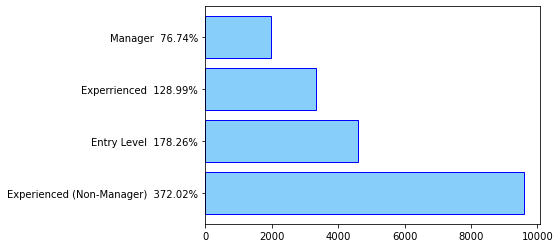

In [131]:
total = 2580
langs = ['Experienced (Non-Manager)','Entry Level', 'Experrienced', 'Manager']
langs_users_num = np.array([9598,4599, 3328, 1980])
percent = langs_users_num/total*100
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]
plt.barh(langs, langs_users_num, color='lightskyblue', edgecolor='blue' )
plt.yticks(range(len(langs)), new_labels)
plt.show()

# i do visualization on the most job category  available in 2020/2021 and result show that software engineering better one

<AxesSubplot:title={'center':' Most Job category in 2020/2021 '}>

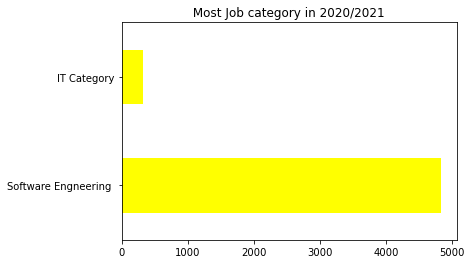

In [132]:
StandardJobTitle = df['StandardJobTitle'].value_counts()[:2]
StandardJobTitle.plot(kind = 'barh',color = "yellow",title=' Most Job category in 2020/2021 ')

# i do visualization on the most job category  available in 2014/2016 and result show that software engineering better one

<AxesSubplot:title={'center':' Most Job category in 2014/2016 '}>

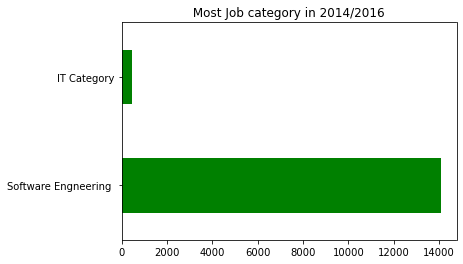

In [133]:
StandardJobTitle = asd['StandardJobTitle'].value_counts()[:2]
StandardJobTitle.plot(kind = 'barh',color = "green",title=' Most Job category in 2014/2016 ')

# i do visualization on the most job category available in the last 5 years and result show that software engineering better one

<AxesSubplot:title={'center':' Most Job category in the last 5 years '}>

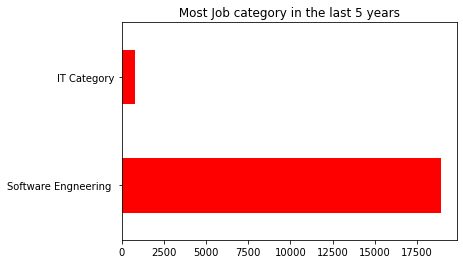

In [134]:
StandardJobTitle = final['StandardJobTitle'].value_counts()[:2]
StandardJobTitle.plot(kind = 'barh',color = "red",title=' Most Job category in the last 5 years ')

# location value counts

In [135]:
final.Location.value_counts()

Cairo                               9909
Giza                                2567
Alexandria                           712
Maadi, Cairo                         440
 - Cairo Egypt                       436
                                    ... 
 - Krakow Poland                       1
EL Sharkyia                            1
EL Minia                               1
Cairo, Alex, Delta, Upper, Egypt       1
6 october city                         1
Name: Location, Length: 576, dtype: int64

# i do visualization on most of the jobs in the governorates of Egypt and Cairo is the most governorate contain jobs

<AxesSubplot:title={'center':'The most jobs are located in the governorates of Egypt'}>

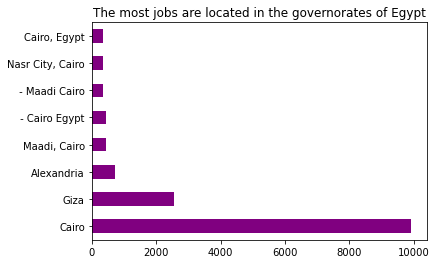

In [136]:
location = final['Location'].value_counts()[:8]
location.plot(kind = 'barh',color = "purple",title='The most jobs are located in the governorates of Egypt')

# i do visualization on Number of jobs available in the 5 last years and 2015 was most one 

<AxesSubplot:title={'center':'Number of jobs available in the 5 last years'}>

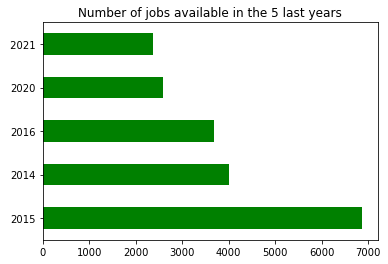

In [137]:
YEARS = final['year'].value_counts()[:5]
YEARS.plot(kind = 'barh',color = "green",title='Number of jobs available in the 5 last years')

# i do visualization on number of years experience to work at jobs in last 5 years

<AxesSubplot:title={'center':'YEARS OF EXPERIENCE'}>

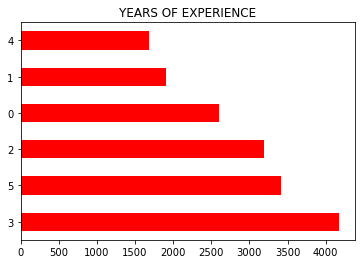

In [138]:
YEARSD = final['YearsOfExperience'].value_counts()[:6]
YEARSD.plot(kind = 'barh',color = "red",title='YEARS OF EXPERIENCE')

# i do visualization on the most 10 title jobs available in the last 5 years

<AxesSubplot:title={'center':'Most 10 offers during the last 5 years '}>

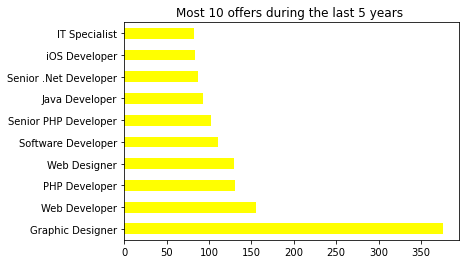

In [139]:
title = final['job_titles1'].value_counts()[:10]
title.plot(kind='barh',color = "yellow",title='Most 10 offers during the last 5 years ') 

# Finally I finished the project and I hope I have fulfilled all the requirements accurately